In [1]:
import os
from nltk.corpus import stopwords
from nltk import word_tokenize
from string import punctuation
import random

In [2]:
s = str.maketrans('', '', punctuation)
a = 'salam!@'
a.translate(s)

'salam'

In [3]:
stop_words = stopwords.words('english')

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Skygate
[nltk_data]     OPR5\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [7]:
negative_documents = []
max_len_negative = 0
for file in os.listdir('data/neg'):
    with open('data/neg/' + file) as f:
        text = f.read()
        tokens = word_tokenize(text)
        translator = str.maketrans('', '', punctuation)
        tokens = [w.translate(translator) for w in tokens]
        tokens = [w for w in tokens if not w in stop_words]
        if len(tokens) > max_len_negative:
            max_len_negative = len(tokens)
        negative_documents.append(' '.join(tokens))
len(negative_documents)

1000

In [8]:
max_len_negative

1400

In [9]:
positive_documents = []
max_len_positive = 0
for file in os.listdir('data/pos'):
    with open('data/pos/' + file) as f:
        text = f.read()
        tokens = word_tokenize(text)
        translator = str.maketrans('', '', punctuation)
        tokens = [w.translate(translator) for w in tokens]
        tokens = [w for w in tokens if not w in stop_words]
        if len(tokens) > max_len_positive:
            max_len_positive = len(tokens)
        positive_documents.append(' '.join(tokens))
len(positive_documents)

1000

In [10]:
max_len_positive

1693

In [11]:
max_len = max(max_len_negative, max_len_positive)

In [12]:
random.shuffle(negative_documents)
random.shuffle(positive_documents)

In [13]:
X_train = negative_documents[:800] + positive_documents[:800]

In [14]:
len(X_train)

1600

In [15]:
y_train = [0 for _ in range(800)] + [1 for _ in range(800)]

In [16]:
len(y_train)

1600

In [17]:
X_test = negative_documents[800:] + positive_documents[800:]
len(X_test)

400

In [18]:
y_test = [0 for _ in range(200)] + [1 for _ in range(200)]

In [19]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Embedding, Conv1D, MaxPool1D, Dropout
from tensorflow.keras.layers import concatenate

In [20]:
max_len

1693

In [21]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [23]:
import pickle
with open('tokenizer.h5', 'wb') as f:
    pickle.dump(tokenizer, f)

In [22]:
tokenizer

In [23]:
vocab_len = len(tokenizer.word_index) + 1

In [24]:
vocab_len

40371

In [25]:
encoded = tokenizer.texts_to_sequences(X_train)

In [26]:
encoded[0]

[131,
 11347,
 649,
 1079,
 5539,
 7840,
 541,
 783,
 554,
 4984,
 1339,
 2287,
 6873,
 23798,
 18139,
 4040,
 1093,
 2197,
 9285,
 8465,
 6874,
 7318,
 5826,
 3776,
 6144,
 1105,
 10217,
 307,
 1116,
 994,
 7319,
 1044,
 750,
 166,
 2775,
 202,
 14962,
 93,
 784,
 166,
 2775,
 186,
 870,
 128,
 176,
 255,
 12917,
 198,
 523,
 5251,
 292,
 17,
 101,
 893,
 11348,
 1641,
 249,
 476,
 279,
 311,
 627,
 1079,
 5539,
 52,
 7841,
 4540,
 198,
 6487,
 68,
 4741,
 554,
 4984,
 52,
 11349,
 116,
 2927,
 23799,
 7842,
 1240,
 3201,
 23800,
 533,
 12918,
 7840,
 541,
 783,
 52,
 4985,
 10218,
 290,
 1339,
 2287,
 6873,
 52,
 972,
 9286,
 778,
 14963,
 1339,
 52,
 8466,
 12918,
 2198,
 1831,
 199,
 453,
 11,
 1551,
 229,
 1832,
 3,
 3519,
 14964,
 6875,
 4742,
 237,
 7843,
 103,
 166,
 2775,
 202,
 5540,
 23801,
 23802,
 376,
 4986,
 9287,
 6,
 392,
 2,
 528,
 1259,
 5541,
 17,
 1,
 495,
 9,
 23803,
 7320,
 18140,
 2776,
 398,
 45,
 103,
 100,
 205,
 1,
 2,
 51,
 66,
 103,
 297,
 2080,
 191,
 928

In [27]:
padded = pad_sequences(encoded, maxlen=max_len, padding='post')

In [28]:
padded.shape

(1600, 1693)

In [29]:
input1 = Input(shape=(max_len,))
embedding1 = Embedding(vocab_len, 100)(input1)
conv1 = Conv1D(filters=32, kernel_size=4, activation='relu')(embedding1)
drop1 = Dropout(0.5)(conv1)
pool1 = MaxPool1D(pool_size=2)(drop1)
flat1 = Flatten()(pool1)
dense1 = Dense(10, activation='relu')(flat1)
output = Dense(1, activation='sigmoid')(dense1)

In [30]:
model = Model(inputs=[input1], outputs=output)

In [31]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1693)]            0         
                                                                 
 embedding (Embedding)       (None, 1693, 100)         4037100   
                                                                 
 conv1d (Conv1D)             (None, 1690, 32)          12832     
                                                                 
 dropout (Dropout)           (None, 1690, 32)          0         
                                                                 
 max_pooling1d (MaxPooling1D  (None, 845, 32)          0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 27040)             0         
                                                             

In [33]:
encoded_test = tokenizer.texts_to_sequences(X_test)
padded_test = pad_sequences(encoded_test, maxlen=max_len, padding='post')

In [34]:
padded_test.shape

(400, 1693)

In [35]:
import numpy as np

In [36]:
model.fit([padded], np.array(y_train), epochs=10, batch_size=20, validation_data=([padded_test], np.array(y_test)))

Epoch 1/10
80/80 [==============================] - 21s 211ms/step - loss: 0.6873 - accuracy: 0.5431 - val_loss: 0.6919 - val_accuracy: 0.5300
Epoch 2/10
80/80 [==============================] - 16s 206ms/step - loss: 0.4643 - accuracy: 0.8487 - val_loss: 0.5724 - val_accuracy: 0.6850
Epoch 3/10
80/80 [==============================] - 17s 209ms/step - loss: 0.0414 - accuracy: 0.9975 - val_loss: 0.5314 - val_accuracy: 0.7425
Epoch 4/10
80/80 [==============================] - 16s 206ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.4909 - val_accuracy: 0.7575
Epoch 5/10
80/80 [==============================] - 16s 205ms/step - loss: 0.0023 - accuracy: 1.0000 - val_loss: 0.4887 - val_accuracy: 0.7700
Epoch 6/10
80/80 [==============================] - 16s 205ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.4859 - val_accuracy: 0.7675
Epoch 7/10
80/80 [==============================] - 16s 204ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.4861 - val_accuracy: 0.7725

In [39]:
model.save('textcnn.h5')

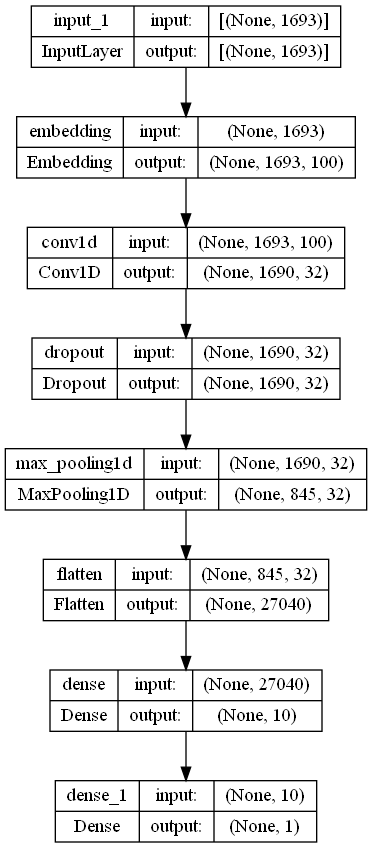

In [37]:
plot_model(model, show_shapes=True)

In [38]:
from tensorflow.keras.models import load_model

In [2]:
model = load_model('textcnn.h5')

In [24]:
with open('tokenizer.h5', 'rb') as f:
    tokenizer = pickle.load(f)

In [26]:
tokenizer.word_index

{'film': 1,
 'nt': 2,
 'movie': 3,
 'one': 4,
 'like': 5,
 'even': 6,
 'time': 7,
 'good': 8,
 'would': 9,
 'story': 10,
 'much': 11,
 'also': 12,
 'get': 13,
 'character': 14,
 'characters': 15,
 'two': 16,
 'first': 17,
 'see': 18,
 'way': 19,
 'well': 20,
 'could': 21,
 'make': 22,
 'films': 23,
 'really': 24,
 'little': 25,
 'life': 26,
 'people': 27,
 'plot': 28,
 'man': 29,
 'scene': 30,
 'never': 31,
 'bad': 32,
 'new': 33,
 'best': 34,
 'many': 35,
 'scenes': 36,
 'movies': 37,
 'know': 38,
 'great': 39,
 'director': 40,
 'another': 41,
 'love': 42,
 'action': 43,
 'something': 44,
 'go': 45,
 'end': 46,
 'still': 47,
 'us': 48,
 'back': 49,
 'seems': 50,
 'world': 51,
 'made': 52,
 'work': 53,
 'makes': 54,
 'big': 55,
 'however': 56,
 'every': 57,
 'seen': 58,
 'though': 59,
 'take': 60,
 'audience': 61,
 'enough': 62,
 'better': 63,
 'real': 64,
 'around': 65,
 'going': 66,
 'may': 67,
 'gets': 68,
 'role': 69,
 'look': 70,
 'things': 71,
 'performance': 72,
 'think': 73,
 '

In [62]:
def testing(ss):
    tokens = word_tokenize(ss)
    translator = str.maketrans('', '', punctuation)
    tokens = [w.translate(translator) for w in tokens]
    tokens = [w for w in tokens if not w in stop_words]
    dd = tokenizer.texts_to_sequences([tokens])
    padd = pad_sequences(dd, maxlen=max_len, padding='post')
    return padd

In [71]:
if(model.predict(testing(input()))[0][0]>0.5):
    print('Pos')
else:
    print("Neg")

1/1 [==============================] - 0s 34ms/step
Pos
